In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv (r'C:\Users\DANIEL\Documents\DataScience\data\train.csv')
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
test = pd.read_csv (r'C:\Users\DANIEL\Documents\DataScience\data\tes.csv')
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [4]:
train.shape

(913000, 4)

In [5]:
train.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [6]:
# DATES FEATURES
def date_features(df):
    # Date Features
    train['date'] = pd.to_datetime(train['date'])
    train['year'] = train.date.dt.year
    train['month'] = train.date.dt.month
    train['day'] = train.date.dt.day
    train['dayofyear'] = train.date.dt.dayofyear
    train['dayofweek'] = train.date.dt.dayofweek
    train['weekofyear'] = train.date.dt.weekofyear
    
    # Additionnal Data Features
    train['day^year'] = np.log((np.log(train['dayofyear'] + 1)) ** (train['year'] - 2000))
    
    # Drop date
    train.drop('date', axis=1, inplace=True)
    
    return df

# Dates Features for Train, Test
train, test = date_features(train), date_features(test)



KeyError: 'date'

In [7]:
train.head()

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year
0,1,1,13,2013,1,1,1,1,1,-4.764668
1,1,1,11,2013,1,2,2,2,1,1.222622
2,1,1,14,2013,1,3,3,3,1,4.246245
3,1,1,13,2013,1,4,4,4,1,6.186505
4,1,1,10,2013,1,5,5,5,1,7.581575


In [8]:
train.dtypes

store           int64
item            int64
sales           int64
year            int64
month           int64
day             int64
dayofyear       int64
dayofweek       int64
weekofyear      int64
day^year      float64
dtype: object

In [9]:
# Daily Average, Monthly Average for train
train['daily_avg']  = train.groupby(['item','store','dayofweek'])['sales'].transform('mean')
train['monthly_avg'] = train.groupby(['item','store','month'])['sales'].transform('mean')
train = train.dropna()

In [10]:
# Average sales for Day_of_week = d per Item,Store
daymonth_avg = train.groupby(['item','store','dayofweek'])['sales'].mean().reset_index()
daymonth_avg.head()

,item,store,dayofweek,sales
0,1,1,0,15.584615
1,1,1,1,18.168582
2,1,1,2,18.793103
3,1,1,3,19.452107
4,1,1,4,21.015326


In [11]:
# Average sales for Month = m per Item,Store
monthly_avg = train.groupby(['item','store','month'])['sales'].mean().reset_index()
monthly_avg.head()

,item,store,month,sales
0,1,1,1,13.709677
1,1,1,2,14.631206
2,1,1,3,17.600000
3,1,1,4,20.786667
4,1,1,5,22.245161


In [12]:
train.head()

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year,daily_avg,monthly_avg
0,1,1,13,2013,1,1,1,1,1,-4.764668,18.168582,13.709677
1,1,1,11,2013,1,2,2,2,1,1.222622,18.793103,13.709677
2,1,1,14,2013,1,3,3,3,1,4.246245,19.452107,13.709677
3,1,1,13,2013,1,4,4,4,1,6.186505,21.015326,13.709677
4,1,1,10,2013,1,5,5,5,1,7.581575,22.973180,13.709677


In [ ]:
#train.to_excel(r'C:\Users\DANIEL\Documents\DataScience\data\check.xlsx', index = False)

In [ ]:
#sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['customers'])

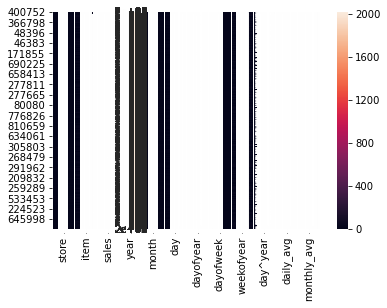

In [15]:
sns.heatmap(train.sample(n=200000), annot=True)